<a href="https://colab.research.google.com/github/VigneshwaraChinnadurai/ML-Learning/blob/master/Session_25_Hierarchical_Clustering/Hierarchical_Clustering_ml_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#STEP-1: Install Import Libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1soj9kJ5---BvBAqyuPSlYHsoeC_Z99q7'})
# replace the id with id of file you want to access
downloaded.GetContentFile('Mall_Customers.csv') 

#STEP-4: Read File

#3.1 Read file as panda dataframe
import pandas as pd
data = pd.read_csv('Mall_Customers.csv') 
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('Mall_Customers.csv')

x=data.iloc[:,[3,4]].values

# We use clustering when the user don't know how to categorise the data to different groups.

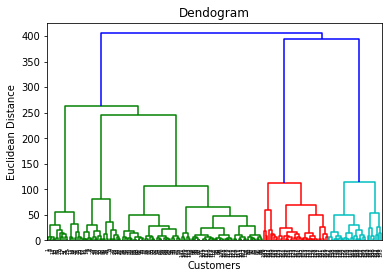

In [3]:
# Using the Dendogram to find the optimal number of clusters.

import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [0]:
# Applying the Hierarchical Clustering to dataset
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)


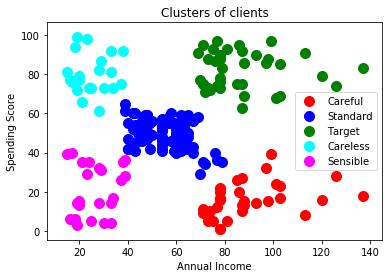

In [5]:
# Visualizing the clusters

plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='Careful')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='blue',label='Standard')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='green',label='Target')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c='cyan',label='Careless')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=100,c='magenta',label='Sensible')
plt.title('Clusters of clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()